## Árvore Binária de Busca

In [1]:
# Import of auxiliar files for show image of us tree
from aux_plot_tree import graphviz, image_tree, delete_file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
class No:
  def __init__(self, valor):
    self.valor = valor
    self.esquerda = None
    self.direita = None
  
  def mostra_no(self):
    print(self.valor)

In [3]:
class ArvoreBinariaBusca:
  def __init__(self):
    self.raiz = None
    self.ligacoes = []
    self.vec_pre_ordem = []
    self.vec_em_ordem = []
    self.vec_pos_ordem = []

  def inserir(self, valor):
    novo = No(valor) # Queremos inserir um novo valor na minha árvore, 
                     # porém esse valor tem que ser um Nó, portanto temos
                     # que instanciar uma nova classe Nó com o valor que queremos inserir.

    # Se a árvore estiver vazia
    if self.raiz == None:
      self.raiz = novo # Ou seja, "self.raiz" está apontando para o primeiro nó que foi criado, quando a arvore estava vazia.
                       # A partir de agora não irá mais acontecer de entrarmos nessa condição, porque a raíz já está definida. 
                       # Sempre que utilizarmos "self.raiz" estamos na realidade pegando o Nó raiz, que tem algo na esquerda e direita tb.
                       # Conforme foi definido na class lá de cima.

    else:
      atual = self.raiz # Então "atual" está pegando o Nó do topo, que está guardado dentro de "self.raiz"
      
      # Laço para percorrer toda a árvore e acharmos o local correto de realizarmos essa inserção.
      while (True):
        pai = atual # Que começa no topo da nossa árvore, lá em raiz.
        
        # Inserção do nó pela Esquerda
        
        # Se o valor que queremos inserir na árvore for menor que o valor que está guardado dentro do Nodo atual que estamos verificando
        # então a inserção será veito na esquerda do nó.
        if valor < atual.valor:
          atual = atual.esquerda 
          if atual == None:  # Achamos o local de realizarmos a inserção
            pai.esquerda = novo 
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return
          
        # Inserção do nó pela Direita
        else:
          atual = atual.direita
          
          if atual == None:
            pai.direita = novo
            self.ligacoes.append(str(pai.valor) + '->' + str(novo.valor))
            return

  def pesquisar(self, valor):
    atual = self.raiz
    while atual.valor != valor:
      if valor < atual.valor:
        atual = atual.esquerda
      else:
        atual = atual.direita
      if atual == None:
        return None
    return atual

  # Raiz, Esquerda, Direita      
  def pre_ordem(self, no):
    if no != None:
      # print(no.valor)
      self.vec_pre_ordem.append(no.valor)
      self.pre_ordem(no.esquerda)
      self.pre_ordem(no.direita)

  # Esquerda, Raiz, Direita
  def em_ordem(self, no):
    if no != None:
      self.em_ordem(no.esquerda)
      # print(no.valor)
      self.vec_em_ordem.append(no.valor)
      self.em_ordem(no.direita)
 
  # Esquerda, Direita, Raiz
  def pos_ordem(self, no):
    if no != None:
      self.pos_ordem(no.esquerda)
      self.pos_ordem(no.direita)
      # print(no.valor)
      self.vec_pos_ordem.append(no.valor)

  def excluir(self, valor):
    if self.raiz == None:
      print('A árvore está vazia')
      return
    
    # Encontrar o nó
    atual = self.raiz
    pai = self.raiz
    e_esquerda = True
    while atual.valor != valor:
      pai = atual
      # Esquerda
      if valor < atual.valor:
        e_esquerda = True
        atual = atual.esquerda
      # Direita
      else:
        e_esquerda = False
        atual = atual.direita
      if atual == None:
        return False
    
    # O nó a ser apagado é uma folha
    if atual.esquerda == None and atual.direita == None:
      if atual == self.raiz:
        self.raiz = None
      elif e_esquerda == True:
        
        self.ligacoes.remove(str(pai.valor) + '->' + str(atual.valor))
        
        pai.esquerda = None
      else:
        
        self.ligacoes.remove(str(pai.valor) + '->' + str(atual.valor))
        
        pai.direita = None

    # O nó a ser apagado não possui filho na direita
    elif atual.direita == None:
      
      self.ligacoes.remove(str(pai.valor) + '->' + str(atual.valor))
      
      if atual == self.raiz:
        self.raiz = atual.esquerda

      elif e_esquerda == True:
        pai.esquerda = atual.esquerda

        self.ligacoes.append(str(pai.valor) + '->' + str(atual.esquerda.valor))

      else:
        pai.direita = atual.esquerda

        self.ligacoes.append(str(pai.valor) + '->' + str(atual.esquerda.valor))

        
    # O nó a ser apagado não possui filho na esquerda
    elif atual.esquerda == None:

      self.ligacoes.remove(str(pai.valor) + '->' + str(atual.valor))
      self.ligacoes.remove(str(atual.valor) + '->' + str(atual.direita.valor))

      if atual == self.raiz:

        self.ligacoes.append(str(raiz.valor) + '->' + str(atual.direita.valor))

        self.raiz = atual.direita
      elif e_esquerda == True:

        self.ligacoes.append(str(pai.valor) + '->' + str(atual.direita.valor))

        pai.esquerda = atual.direita
      else:

        self.ligacoes.append(str(pai.valor) + '->' + str(atual.direita.valor))

        pai.direita = atual.direita
    
    # O nó possui dois filhos
    else:
        sucessor, pai_sucessor = self.get_sucessor(atual)  # modifique aqui, retornando pai_sucessor também

        self.ligacoes.remove(str(pai.valor) + '->' + str(atual.valor))

        if pai_sucessor != atual:  # adicione essa condição
            self.ligacoes.remove(str(pai_sucessor.valor) + '->' + str(sucessor.valor))
            pai_sucessor.esquerda = sucessor.direita
            sucessor.direita = atual.direita
            self.ligacoes.append(str(sucessor.valor) + '->' + str(atual.direita.valor))

        self.ligacoes.remove(str(atual.valor) + '->' + str(atual.esquerda.valor))
        self.ligacoes.remove(str(atual.valor) + '->' + str(atual.direita.valor))

        if atual == self.raiz:
            self.raiz = sucessor
        elif e_esquerda == True:
            pai.esquerda = sucessor
        else:
            pai.direita = sucessor

        self.ligacoes.append(str(pai.valor) + '->' + str(sucessor.valor))
        self.ligacoes.append(str(sucessor.valor) + '->' + str(atual.esquerda.valor))

        sucessor.esquerda = atual.esquerda

    # Atualizar a lista de ligações em pré-ordem
    self.ligacoes.clear()
    self.atualizar_ligacoes(self.raiz)

    self.vec_pre_ordem.clear()
    self.vec_em_ordem.clear()
    self.vec_pos_ordem.clear()
    self.pre_ordem(self.raiz)
    self.em_ordem(self.raiz)
    self.pos_ordem(self.raiz)

    return True
  
  def atualizar_ligacoes(self, no):
    if no is not None:
        if no.esquerda is not None:
            self.ligacoes.append(str(no.valor) + '->' + str(no.esquerda.valor))
            self.atualizar_ligacoes(no.esquerda)
        if no.direita is not None:
            self.ligacoes.append(str(no.valor) + '->' + str(no.direita.valor))
            self.atualizar_ligacoes(no.direita)

  def get_sucessor(self, no):
      pai_sucessor = no
      sucessor = no
      atual = no.direita
      while atual != None:
          pai_sucessor = sucessor
          sucessor = atual
          atual = atual.esquerda
      if sucessor != no.direita:
          pai_sucessor.esquerda = sucessor.direita
          sucessor.direita = no.direita
      return sucessor, pai_sucessor  # modifique aqui, retornando pai_sucessor também


  def mostrar_travessia(self, vetor):
    """
    Retorna uma string em formato de vetor representando a ordem da travessia escolhida.

    Argumentos:
    vetor (lista de inteiros): Lista de inteiros.
      - Este vetor é a saída dos métodos de percurso: pre_ordem(), em_ordem(), pos_ordem()

    Retorno:
    str: String com a ordem representativa do percuso feito no modelo de travessia passado como parâmetro.
    """

    if vetor == self.vec_pre_ordem:
      self.travessia = self.vec_pre_ordem
    elif vetor == self.vec_em_ordem:
      self.travessia = self.vec_em_ordem
    elif vetor == self.vec_pos_ordem:
      self.travessia = self.vec_pos_ordem
    else:
      print('Vetor vazio ou não cumpriu os requisitos da função, portanto será printado a travessia Em Ordem:\n')
      self.em_ordem(self.raiz)
      self.travessia = self.vec_em_ordem

    self.saida = '['
    for item in self.travessia:
      self.saida += str(item) + str(', ')
    self.saida = self.saida[:-1]
    self.saida = self.saida[:-1]
    self.saida += ']'
    print(self.saida)

 
  def show_tree_online(self):
    for item in self.ligacoes:
      print(item)

  def show_tree(self):
    elementos = self.ligacoes

    # Chame a função passando a lista de elementos
    conteudo = graphviz(elementos)

    # Crie e salve o arquivo no formato: .dot
    with open("aux_show_tree.dot", "w") as arquivo_dot:
      arquivo_dot.write(conteudo)

    image_tree("aux_show_tree.dot", "show_tree.png")

    delete_file("aux_show_tree.dot")

    imagem = mpimg.imread("show_tree.png")
    plt.imshow(imagem)
    plt.axis('off')
    plt.show()

    delete_file("show_tree.png")

In [4]:
arvore = ArvoreBinariaBusca()
arvore.inserir(53)
arvore.inserir(30)
arvore.inserir(14)
arvore.inserir(39)
arvore.inserir(9)
arvore.inserir(23)
arvore.inserir(34)
arvore.inserir(49)
arvore.inserir(72)
arvore.inserir(61)
arvore.inserir(84)
arvore.inserir(79)

# Método de travessia Pré Ordem

- Primeiro visita a raiz e depois recursivamente faz uma travessia na subárvore esquerda, seguido de um travessia recursiva na subárvore direita.
- Raiz -> Esquerda -> Direita

In [5]:
arvore.pre_ordem(arvore.raiz)

53
30
14
9
23
39
34
49
72
61
84
79


# Método de travessia Em Ordem 

- Recursivamente faz a travessia na subárvore esquerda, visita a raiz e faz uma travessia recursiva na subárvore direita. </br>
- Esquerda -> Raiz -> Direita

In [6]:
arvore.em_ordem(arvore.raiz)

9
14
23
30
34
39
49
53
61
72
79
84


# Método de travessia Pos Ordem

- Recursivamente faz a travessia na subárvore esquerda, faz uma travessia recursiva na subárvore direita e por fim visita a raiz.
- Esquerda -> Direita -> Raiz

In [7]:
arvore.pos_ordem(arvore.raiz)

9
23
14
34
49
39
30
61
79
84
72
53


# Função Mostrar Travessia

- Para isto precisa ser passado algum vetor de saída dos métodos de travessia:  <br>  
    self.vec_pre_ordem = [ ]<br>
    self.vec_em_ordem = [ ]<br>
    self.vec_pos_ordem = [ ]

In [8]:
print("Travessia pré ordem: ")
arvore.mostrar_travessia(arvore.vec_pre_ordem)

print("\nTravessia em ordem:")
arvore.mostrar_travessia(arvore.vec_em_ordem)

print("\nTravessia pós ordem:")
arvore.mostrar_travessia(arvore.vec_pos_ordem)

Travessia pré ordem: 
[53, 30, 14, 9, 23, 39, 34, 49, 72, 61, 84, 79]

Travessia em ordem:
[9, 14, 23, 30, 34, 39, 49, 53, 61, 72, 79, 84]

Travessia pós ordem:
[9, 23, 14, 34, 49, 39, 30, 61, 79, 84, 72, 53]


# Configuração para a função show_tree():

### Executando o comando no terminal

Para gerar uma imagem PNG da Árvore Binária a partir de um arquivo DOT, execute o seguinte comando no terminal:

```bash
dot -Tpng nome_do_arquivo.dot -o nome_da_imagem_gerada.png

http://webgraphviz.com/


### Estrutura básica de um arquivo .dot

A estrutura básica de um arquivo .dot é a seguinte:

```dot
digraph G {
    // AQUI ENTRA A SAÍDA DA FUNÇÃO SHOW_TREE()
}


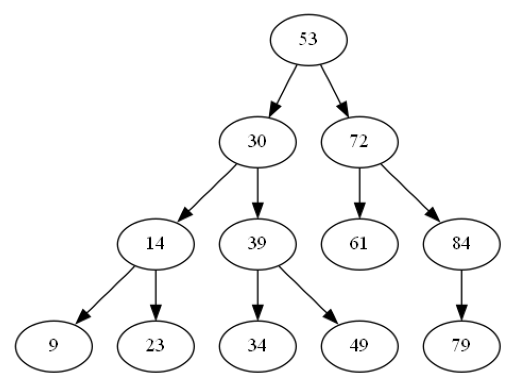

In [9]:
arvore.show_tree()

Travessia pré ordem: 
[53, 30, 14, 9, 23, 39, 34, 49, 72, 61, 84, 79]

Travessia em ordem:
[9, 14, 23, 30, 34, 39, 49, 53, 61, 72, 79, 84]

Travessia pós ordem:
[9, 23, 14, 34, 49, 39, 30, 61, 79, 84, 72, 53]

---------------------------------------------

14 foi excluido


Travessia pré ordem: 
[53, 30, 14, 9, 23, 39, 34, 49, 72, 61, 84, 79]

Travessia em ordem:
[9, 14, 23, 30, 34, 39, 49, 53, 61, 72, 79, 84]

Travessia pós ordem:
[9, 23, 14, 34, 49, 39, 30, 61, 79, 84, 72, 53]


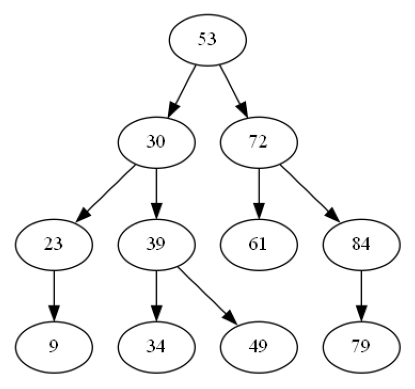

In [10]:
print("Travessia pré ordem: ")
arvore.mostrar_travessia(arvore.vec_pre_ordem)

print("\nTravessia em ordem:")
arvore.mostrar_travessia(arvore.vec_em_ordem)

print("\nTravessia pós ordem:")
arvore.mostrar_travessia(arvore.vec_pos_ordem)

arvore.excluir(14) 
print('\n---------------------------------------------\n')
print('14 foi excluido\n\n')

print("Travessia pré ordem: ")
arvore.mostrar_travessia(arvore.vec_pre_ordem)

print("\nTravessia em ordem:")
arvore.mostrar_travessia(arvore.vec_em_ordem)

print("\nTravessia pós ordem:")
arvore.mostrar_travessia(arvore.vec_pos_ordem)

arvore.show_tree()

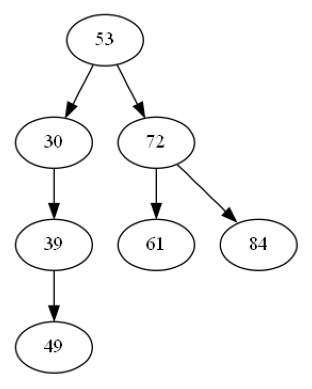

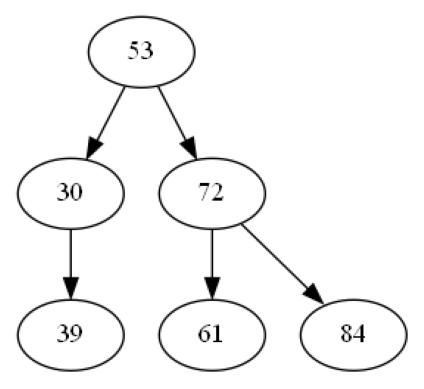

In [11]:
arvore.excluir(9)  # Teste de "é uma folha - esquerda"
arvore.excluir(23) # Teste de "É uma folha - direita"
arvore.excluir(79) # Teste de "não tem filho à direita"
arvore.excluir(34)
arvore.show_tree()
arvore.excluir(49) # Teste de "não tem filho à esquerda"
arvore.show_tree()